# ECE 311 Lab 1: Introduction to Python
## Due Date: 9/5 @ 11:59PM on Canvas

Hello and welcome to ECE 311: Digital Signal Processing Lab! The main goals of this course are to:

* Reinforce the concepts you learn in ECE 310.
* Give you experience with Python, which is a popular programming language for work in signal processing, machine learning, and many other fields.
* Demonstrate the applications of signal processing within and beyond the context of ECE 310. And hopefully encourage you to take more courses in Signal Processing!

This first lab will serve as an introduction to Python and the scripting environment we will use throughout the class, Jupyter (or IPython) Notebooks. To be clear, **ECE 311 is not a programming class**! The students in ECE 311 have a wide range of programming experience, and we want the focus of the course to be on the fundamental tools and interesting applications of signal processing. With that said, we expect you to become more comfortable with Python as the semester goes on and hope you take the time to understand your code. In this lab, we will cover the basic syntax, data types, and a few more advanced techniques that are commonly used when programming in Python. Let's get started!

## Importing Libraries

Python is an object-oriented scripting language that is popular due to its ease of development and tremendous assortment of libraries. The environment we are working in is called a Jupyter Notebook. Each notebook is composed of a collection of code and markdown cells. Markdown cells are those like this one that show text and headings, while code cells execute Python code. In order to run a cell, simply click on the cell and press Ctrl+Enter, Command+Enter, Shift+Enter, or the "Play" button on the toolbar. To add or remove cells, click on the "Insert" and "Edit" tabs in the toolbar, respectively. In the below code cell, we will import three common libraries: numpy (Numerical Python), skimage (Image Processing), matplotlib (implementation of popular MATLAB plotting functions), and a couple other helpful utilities. Go ahead and run the next cell.

In [1]:
import numpy as np # rename the library to np for convenience
import matplotlib.pyplot as plt # we want the "pyplot" module

from IPython.display import Audio # listening to audio
from skimage import io # image i/o
from skimage import transform # image transformations
from scipy.io import wavfile # audio i/o

# allows plots to display in the notebook instead of another window
%matplotlib inline

print('Libraries successfully imported!')

Libraries successfully imported!


## Data Types and Control Structures

### Primitive Data Types
Now that we've imported some basic libraries, let's try creating variables to do simple math and printing. Python has "dynamically-typed" variables, which means the type of a variable is bound at runtime (i.e. when you run your code). In other words, unlike C or Java, we do not need to declare the types of our variables! This does not mean we should be reckless with creating our variables, but rather we have more flexbility.

In [2]:
a = 10 # integer
b = 5. # float
c = 'signal processing is super cool!' # string
d = True # boolean (True/False) data type
e = 3 + 4.j # complex valued number

add = a+b # addition
sub = a-b # subtraction
div = a/b # division
mult = a*b # multiplication
power = a**b # exponent

print('Hello World!') # printing
# '+' is used for string concatenation (connecting)
print('I must tell everyone that a+b is '+str(add)+'!')
# or we can use string formatting to fill in designated locations in a string
print('And also it is {} that {}'.format(d, c))
# or we can use commas to separate multiple things we want to print
print(type(a), type(b), type(c), type(d), type(e))

Hello World!
I must tell everyone that a+b is 15.0!
And also it is True that signal processing is super cool!
<class 'int'> <class 'float'> <class 'str'> <class 'bool'> <class 'complex'>


### Arrays, Lists, and Dictionaries

Three of the most important data types in Python are numpy arrays, lists, and dictionaries. In the below code cell, we explore several ways to create and manipulate these data types. But first, let's discuss their differences. Arrays in Python are like the arrays you may be familiar with from C or C++. They are fixed-sized, ordered collections of variables. In order to access an element in an array, we supply an index in square brackets. If we have a multidimensional array, like an image, we can supply two indices, where the first index is the row and the second index is the column of the array we would like to access. This means that numpy arrays are "row major". **It is best to separate these indices with a comma**. It is important to note that Python zero-indexes its objects. Therefore, if you want the very first element in your array, you should use index "0". We will use numpy arrays the most in this class since they interface seemlessly with all the libraries we use.

Lists are similar to arrays except they do not have a fixed size upon instantiation. Below, you can see how the $\textrm{append()}$ method allows us to place a new element at the end of a list. For those of you familiar with C++ or Java, lists are similar to vectors in these languages. It is common practice to create a list first to store data we do not know the size of, then typecast the list to a numpy array for convenience in later work. **This point is especially important! Take note of how we typecast from list to numpy array below.**

Dictionaries are associative arrays that allow us to store key-value pairs together. Keys are like indices for lists and arrays, except they need not be integers! They can also be strings, floats, tuples, and more. Dictionaries are a great way to store information that is not necessarily ordered or should be referenced by more descriptive information than an integer index. We will not use dictionaries much in this class; however, an introduction to Python would be incomplete without discussing dictionaries.

Run the below code cell and please play around with the syntax. See what works, see what breaks, try printing different variables you create.

In [ ]:
#Arrays
arr0 = np.zeros(3) # make an array of zeros, "np.zeros" means we want the zeros() function in the numpy module
arr1 = np.ones(3) # make an array of ones
arr2 = np.array([1, 2, 3]) # typecasting a list to an array
arr2d = np.array([[1, 5, 9],
                  [2, 3, 4]])
print(arr0)
print(arr2d.shape) # arrays have shape, lists do not
print(arr2d[1, 1]) # can index numpy arrays in multiple dimensions, as shown

In [ ]:
#Lists
x = [1, 2, 3] # simple 3-element list
y = [[1, 2, 3], ['banana', 'apple', 'orange']] # list of lists!
print(x[0], x[1])
print(x[-1]) # indices "wrap around", so we can also use negative indices
print(y[0][0], y[1][2]) # indexing a list of lists
print(len(x)) # len gives us the length of an array or list

# appending to a list
print(x)
x.append(4)
print(x)

In [ ]:
# Dictionaries
d = {} # empty dictionary
d = {'Mechanical Engineering': '5/10', 'Chemical Engineering': '6/10',
    'Electrical and Computer Engineering': '10/10', 'Computer Science': '-1/10'} # initialize some key-value pairs
d['Signal Processing'] = '11/10' # add another key-value pair
print(d['Electrical and Computer Engineering'])

### Control Structures

Now let's look at some control structures. Most of you should be familiar with "if-else" statements (conditional structures) and iterative structures like "for" and "while" loops. Still, let's do a quick review.

If-else statements check if a (boolean) condition is true. **If** this condition is true, we execute the related code; **else** we execute different code. We can create a chain of if-else statements to try several conditions at a particular point in our code.

For loops execute a segment of code as we go through a predetermined set of values for a variable. In Python, all for loops are created as **iterators**. This means we do not count from 0 to 10, for example, like in C. Instead, our iterating variable goes through a collection of values we give it. This may be confusing at first, but it is incredibly convenient, so don't get frustrated if it doesn't make sense immediately. We strongly suggest you play around with the below code examples if you want some practice.

While loops, though we will use them infrequently, allow us to execute a piece of code until a condition is met. Be careful when using while loops to make sure the condition will be eventually met or overriden. Otherwise, your code will run forever!

One last thing we should note is that Python is a white-space driven language. This means we do not use curly braces {} to indicate the scope of a control structure, instead we use indentation (tabs). Each of the examples below demonstrate how this tab-controlled scoping works. Try modifying and uncommenting parts of the code to make sure you understand how to write each control structure. **Helpful tip: you can comment and uncomment a section of code by highlighting multiple lines and typing Ctrl+/ or Command+/.**

In [ ]:
# if-else

a = 5
if(a > 2): # note the colon to terminate the if statement
    print('Hooray!\n') # indentation for the if statement

b = 'Signal Processing'

print(b+'?')
if(b == 'Power'): # double equals is for equality comparison
    print('Eh. Not interesting.')
elif(b == 'Circuits'): # note that "else if" is written as "elif"
    print('No thank you.')
elif(b == 'Signal Processing'):
    print("Now we're talkin'!")
else:
    print('Pass.')

In [ ]:
# for

# range is a function that gives us a list of numbers based on different arguments
# try uncommenting each example to verify what it prints
for i in range(3): # with one integer "n", we get every number from 0 to n-1, inclusive
    print(i)

# for i in range(1,4): #1,2,3
    # print(i)
    
# for i in range(5,0,-1): #5,4,3,2,1
    # print(i)
    
# can also iterate over lists, arrays and dictionaries
a = [1, 5, 9, 20]
for i in a: # i will iterate through every value in a
    print(i)
print('')
for key in d: # i will iterate through every key in the dictionary from the previous code cell
    # print each key value pair
    # string formatting, similar to C/C++, convenient tool for printing
    # variables inside the .format() fill in the curly braces in order
    print('{}: {}'.format(key, d[key]))
print('')

In [ ]:
# while
j = 0
while(j < 4):
    print(j)
    j += 1 # compound addition, equivalent to j = j+1

## Exercise 1:

a) Create a list of integers that represent your UIN. Use a for loop to iterate through and print every number in your UIN. Do not worry about making every number print on the same line: separate lines is fine.

b) Create a dictionary with three key-value pairs that has music artists as keys and one of your favorite songs from them as the value. Or you could do actors and TV shows/movies. Use a for loop to print each key-value pair.

In [14]:
#Code for 1.a) here.
uin = [6,5,6,3,3,5,1,3,5]
for i in uin: print(i)
#Code for 1.b) here
dict = {'Chief Keef':'Save Me', 'Kanye West':'Guilt Trip', 'Kendrick Lamar':'SAMIDOT'}
for i in dict: 
    print(i +':', dict[i])



6
5
6
3
3
5
1
3
5
Chief Keef: Save Me
Kanye West: Guilt Trip
Kendrick Lamar: SAMIDOT


## List Comprehension and Other Techniques

List comprehension is a popular and very efficient way to create lists. If you hear someone talk about "Pythonic" code practices, this is one of them. **Quick tip: if you find yourself coding in Python for an interview, definitely build lists via list comprehension if possible.** List comprehension is when we build a list "in-line". This means we initialize and populate the list all in one line. The below code presents toy examples, but when we start working with real signals like audio, images, etc. this can save lots of time and code. Furthermore, take note again how we typecast the list to a numpy array after constructing it.

Array/list slicing and truth array indices are powerful techniques to extract collections of items from a list based on some conditions. Array slicing allows us to specify a range of indices we would like to extract from an array. Slices can indicate we want a specific segment, every element along a dimension, something like "every other" element, and more. The general format for array slicing can be one of the following:

1. ``array[start:end]``
2. ``array[start:end:step]``

For now, we will start with the first option to extract a segment of an array (bonus: [this stackoverflow post](https://stackoverflow.com/questions/509211/understanding-slice-notation) provides a nice reference for each option). We use a colon (:) to separate the arguments in our slices, and it is important to note that the second argument (``end``) is always **non-inclusive**. This means ``array[2:4]`` will return the elements at index 2 and 3 only. Furthermore, we may slice multiple dimensions at a time. Examples of array slicing and some of these more advanced cases are given below.

We can also build a Boolean array by "asking" a condition of the elements in the array. By placing that Boolean array as the index for our original array, we are able to automatically pull out the values that satisfy this condition! Don't worry if this is all too abstract right now. The following code should make it more concrete. And, as always, take some time to play around with the code. Taking the time now to familiarize yourself with these tools will save tons of time in the future.

In [ ]:
# List Comprehension
a = np.array([i*2 for i in range(1, 51)]) #create a list of the first 50 positive even numbers, then cast to array
b = np.array([i-1 for i in a]) # create a list/array of the first 50 odd numbers from the 'a' list

#Slicing
first_5_even = a[:5] # 2, 4, 6, 8, 10 (the zero at the beginning is inferred)
print('First 5 even numbers')
print(first_5_even)
after_30_even = a[30:] # take every element in 'a' from the index-30 element onward
print('Even numbers after 30')
print(after_30_even)
print('')

#2D Slicing
c = np.array([[1, 2, 3, 4, 5],
              [6, 7, 8, 9, 10],
              [11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20]])
print('Original array')
print(c) # original 2D array
print('Rows 1 and 2')
print(c[1:3]) # print rows 1 and 2
print('Column 0')
print(c[:, 0]) # print every element in the 0 column, commas separate dimensions (rows and columns)
print('Row 0')
print(c[0, :]) # print every element in the 0 row
print('')

#Truth array indices
greater_50 = a > 50 # elements larger than 50
perfect_squares = a % np.sqrt(a)  == 0 # perfect squares
print('Are these even numbers great than 50?')
print(greater_50) # truth array
print('Are these even numbers perfect squares?')
print(perfect_squares)
print('Even numbers greater than 50')
print(a[greater_50]) # show the actual entries in "a" that satisfy the above conditions
print('Perfect square even numbers')
print(a[perfect_squares])

## Exercise 2:

a) Using list comprehension, create an array of the first 100 multiples of 3 (including 0). Then, using array slicing, print the index 20 up to (but not including) index 30 multiples of three. To receive full points, your answer should be two lines (not including any print statements).

b) Using list comprehension, create an array of the first 100 perfect cubes, i.e. 0,1,8,27... (including 0). Then, using a truth array as your indices, print the perfect cubes that are also divisible by 32. To receive full points your answer should be three lines. Don't forget to typecast your list to an array!

In [31]:
#Code for 2.a) here.
a = np.array([i*3 for i in range(1,101)])
print(a[20:30])
#Code for 2.b) here.
b = np.array([i**3 for i in range(1,101)])
divisible = b % 32 == 0
print(b[divisible])

[63 66 69 72 75 78 81 84 87 90]
[     64     512    1728    4096    8000   13824   21952   32768   46656
   64000   85184  110592  140608  175616  216000  262144  314432  373248
  438976  512000  592704  681472  778688  884736 1000000]


## Functions, Plotting, Loading Data

Functions are an important part of any language that supports them. They allow us to encapsulate and modularize our code for repeated and flexible reuse. Rather than rewriting or copying the same code to perform a common task for us, we can just call our function. Below, we define two functions, sine and cosine, that return the values for sine and cosine given an array of input values and a desired linear analog frequency (Hz).

In [19]:
def sine(t, f):
    return np.array([np.sin(2*np.pi*f*time) for time in t])

def cosine(t, f):
    return np.array([np.cos(2*np.pi*f*time) for time in t])

t = np.linspace(0, 5, 1000) # 1000 evenly spaced points from 0 to 5
frequency = 2 # 2 Hz frequency

s = sine(t, frequency)
c = cosine(t, frequency)

Now that we have some signals, let's try plotting them. There are many plotting interfaces we will use in the matplotlib module. The below code cell will show a few of them. Take note of how we label the axes, title, and provide a legend for our plots. **You must always provide adequate labeling in this lab to make sure the graders know what your plots correspond to! Otherwise, you may lose points.**

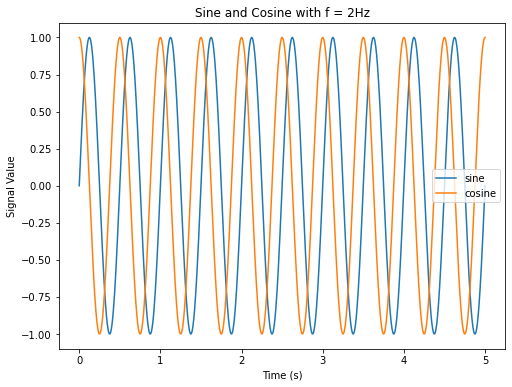

In [20]:
size = (8, 6) # (width, height) format
plt.figure(figsize=size)
plt.plot(t,s,label='sine') # first argument is x-axis, second is y-axis, label is useful if we want a legend
plt.plot(t,c,label='cosine') # labels are not always necessary
plt.title('Sine and Cosine with f = 2Hz') #title
plt.xlabel('Time (s)') #time
plt.ylabel('Signal Value') #ylabel
plt.legend() # legend that uses the "label" identifiers from above

Having one plot with both signals is fine and good, but what if we want separate plots for each signal? Or what if we want them side-by-side as subplots?

Text(0, 0.5, 'Cosine Value')

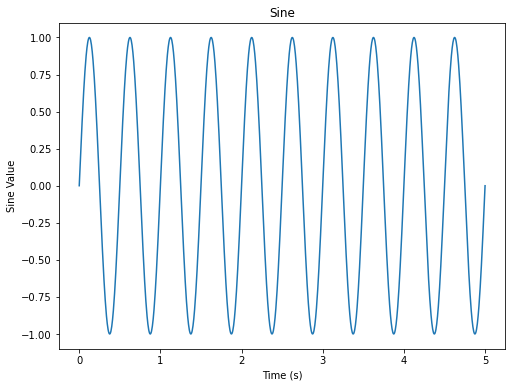

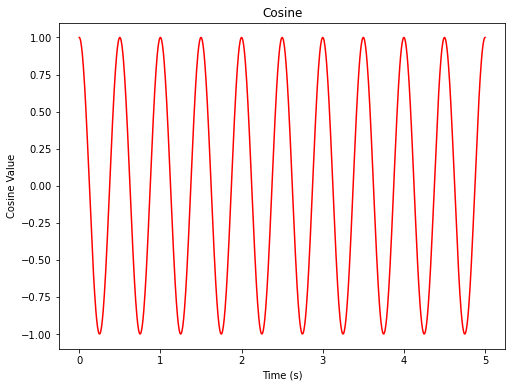

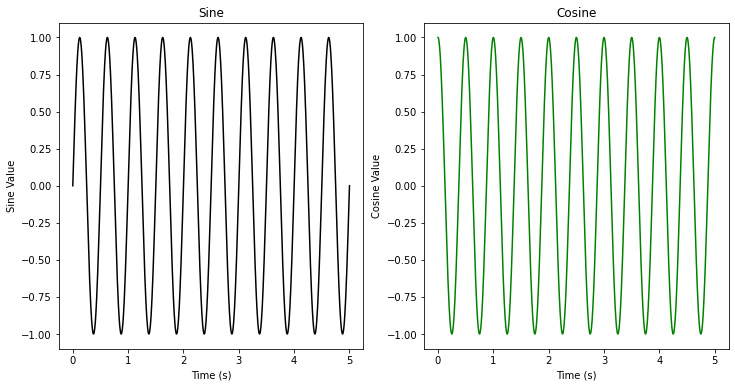

In [21]:
plt.figure(figsize=size) # create separate figure
plt.plot(t,s)
plt.title('Sine')
plt.xlabel('Time (s)')
plt.ylabel('Sine Value')

plt.figure(figsize=size) # create separate figure
plt.plot(t,c,'r') # change color to red
plt.title('Cosine')
plt.xlabel('Time (s)')
plt.ylabel('Cosine Value')

# Subplots. Syntax looks different with multiple plots. Similar
# syntax can be used for single plots also.
plt.figure(figsize=(12,6)) # increase figure size for visibility, first argument is width, second is height
plt.subplot(121) # 1 row, 2 columns, first plot
plt.plot(t,s,'black')
plt.title('Sine')
plt.xlabel('Time (s)')
plt.ylabel('Sine Value')
plt.subplot(122) # 1 row, 2 columns, second plot
plt.plot(t,c,'g')
plt.title('Cosine')
plt.xlabel('Time (s)')
plt.ylabel('Cosine Value')

Another plotting function we will find particularly useful in ECE 311 is $\textrm{plt.stem()}$. This function provides discrete lines for every point in our signal. Be careful using stem when you have long signals as the plot can become cluttered. Thus, for longer signals (greater than length 30, roughly) $\textrm{plt.plot()}$ is best.

Text(0, 0.5, 'Some units')

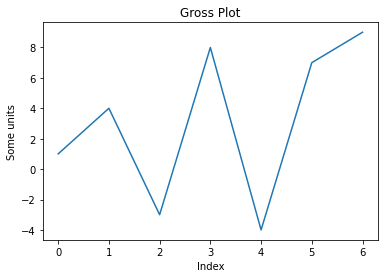

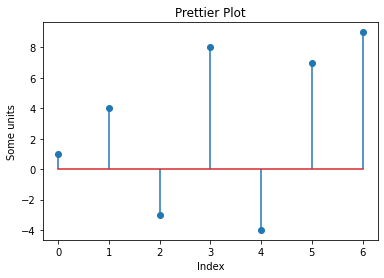

In [22]:
toy_signal = [1, 4, -3, 8, -4, 7, 9]
x_vals = range(len(toy_signal)) # x-axis values
plt.figure()
plt.title('Gross Plot')
plt.plot(x_vals,toy_signal) # this plot looks unnatural
plt.xlabel('Index')
plt.ylabel('Some units')

#now let's try stem
plt.figure()
plt.title('Prettier Plot')
plt.stem(x_vals,toy_signal) #pretty!
plt.xlabel('Index')
plt.ylabel('Some units')

## Exercise 3:

Make a list out of the numbers in your UIN, then display a stem plot of your UIN. Don't forget to put a title and axis labels (even though they don't necessarily make sense right now)!

Text(0, 0.5, 'UIN Number')

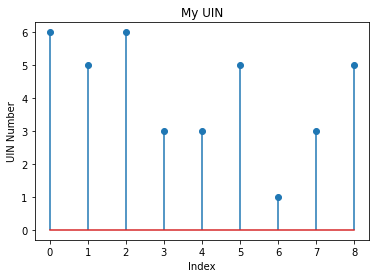

In [23]:
uin = [6, 5, 6, 3, 3, 5, 1, 3, 5]
x_vals = range(len(uin))
plt.figure()
plt.title('My UIN')
plt.stem(x_vals,uin) #pretty!
plt.xlabel('Index')
plt.ylabel('UIN Number')

Now that we know how to do some plotting. Let's try loading and displaying an image. There are tons of different ways to load images with different libraries. For this lab, we will use skimage since it loads images directly to a numpy array, which we will find useful soon. Note the shape of the color and grayscale images in the below code cell.

<class 'numpy.ndarray'>
Color image shape: (1200, 1200, 3)
Grayscale image shape: (1200, 1200)


Text(0, 0.5, 'Pixel Intensity')

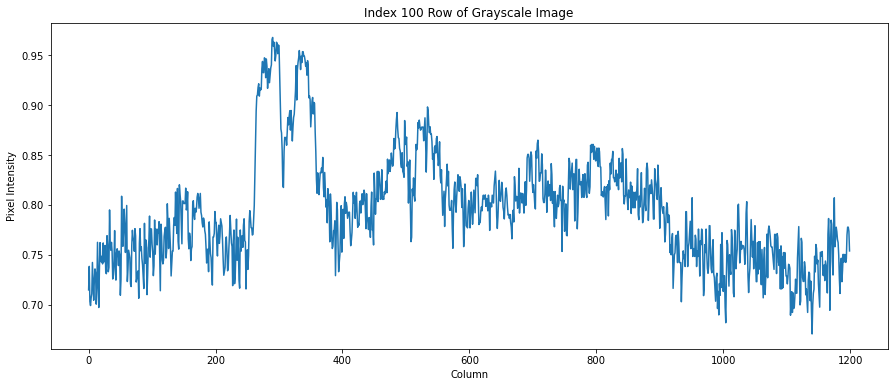

In [24]:
img_color = io.imread('test_image.jpg') # load as color image
img_gray = io.imread('test_image.jpg', as_gray=True) # load in grayscale
img_line = img_gray[100,:] # slice out the 100th row of the image
print(type(img_color)) # verify its a numpy array
# check out the height, width, and number of color channels for both color and grayscale images
print('Color image shape:', img_color.shape) # height,width,color channels
print('Grayscale image shape:', img_gray.shape) # height, width

plt.figure(figsize=(15,6))
plt.plot(range(img_gray.shape[1]), img_line)
plt.title('Index 100 Row of Grayscale Image')
plt.xlabel('Column')
plt.ylabel('Pixel Intensity')

Plotting the pixel data doesn't show us much, right? Let's actually show the images now!

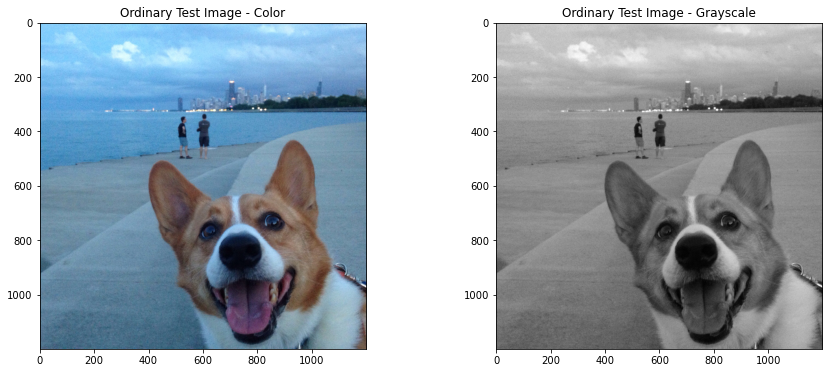

In [12]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title('Ordinary Test Image - Color')
plt.imshow(img_color)
plt.subplot(122)
plt.title('Ordinary Test Image - Grayscale')
plt.imshow(img_gray, 'gray') # tell matplotlib the image is grayscale

Furthermore, it is important to note the discrete nature of each image. This image is at a high resolution, but we may still zoom in to observe individual pixels as discrete blocks. The color image is composed of pixels with three values - red, green, and blue channels - while the grayscale image is composed of single values at each pixel. Thus, a color image is said to be three-dimensional (height, width, color channel) while grayscale images are said to be two-dimensional (height, width only). Let's zoom in to each image to see individual pixels. More precisely, let's check out the corgi's right eye.

Text(0.5, 1.0, 'Grayscale - Zoom #3')

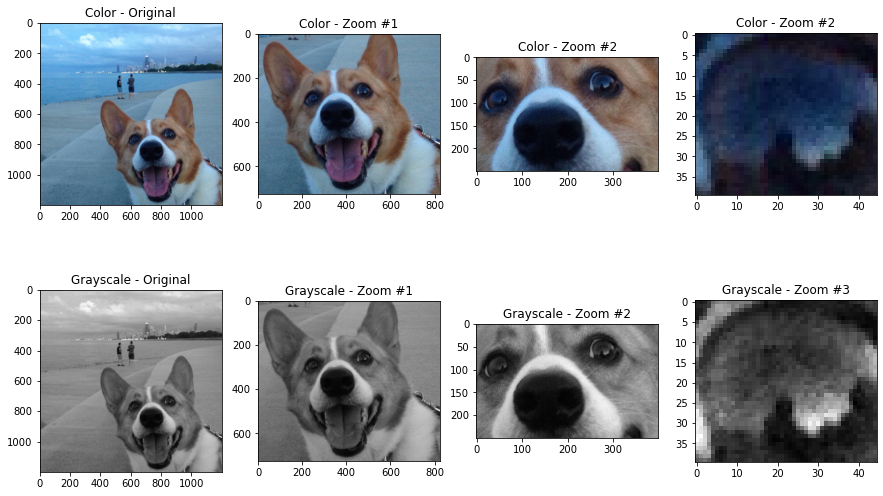

In [25]:
color_zoom_1 = img_color[475:, 375:]
gray_zoom_1 = img_gray[475:, 375:]
color_zoom_2 = color_zoom_1[200:450, 200:600]
gray_zoom_2 = gray_zoom_1[200:450, 200:600]
color_zoom_3 = color_zoom_2[35:75, 255:300]
gray_zoom_3 = gray_zoom_2[35:75, 255:300]
plt.figure(figsize=(15,9))
plt.subplot(241) # two rows, four columns, first image
plt.imshow(img_color)
plt.title('Color - Original')
plt.subplot(242) # two rows, four columns, second image
plt.imshow(color_zoom_1)
plt.title('Color - Zoom #1') # and so on...
plt.subplot(243)
plt.imshow(color_zoom_2)
plt.title('Color - Zoom #2')
plt.subplot(244)
plt.imshow(color_zoom_3)
plt.title('Color - Zoom #2')
plt.subplot(245)
plt.imshow(img_gray,'gray')
plt.title('Grayscale - Original')
plt.subplot(246)
plt.imshow(gray_zoom_1,'gray')
plt.title('Grayscale - Zoom #1')
plt.subplot(247)
plt.imshow(gray_zoom_2,'gray')
plt.title('Grayscale - Zoom #2')
plt.subplot(248)
plt.imshow(gray_zoom_3,'gray')
plt.title('Grayscale - Zoom #3')

Note how we can see individual pixels as square blocks at the lowest resolution. It also looks like we can see an outline of the person who took the picture! Image forensics in Lab 1: amazing!

## Exercise 4:

Reading library and function documentation is an essential part of using Python. You cannot expect to memorize the usage of every function you use. Over the course of this semester, you should become more comfortable with referring to documentation. In this exercise, you will need to look at the documentation of a couple numpy functions to perform a simple image analysis task.

a. We would like to plot each of the color channels of the original color image (contained in the variable ``img_color``). We may do this by creating three separate color images (with all three color channels) where only the channel of interest is filled in from the previous image. Therefore, we suggest you create each channel's image by first creating an array of zeros using $\textrm{np.zeros()}$ with size matching the shape of ``img_color``, i.e. each color channel image should be three-dimensional. Then set the appropriate channel equal to the same channel in the original image using array slicing. Plot each channel's image in one figure using subplots.

**A couple important notes/hints:**
* You must set the data type to integer here to prevent plotting issues. Check the $\textrm{np.zeros()}$ documentation on how to specify the correct data type. You may use the primitive "int" type here when specifying the data type.

* The ``.shape`` attribute wil be helpful to retrieve the shape of a numpy array when specifying the desired shape for $\textrm{np.zeros()}$.

* Remember that using only a colon ":" for a dimension in a numpy array gives you every value for that dimension.

b. Print the sum of the values for each color channel using an appropriate numpy function (look this up!). Make sure it is clear which sum corresponds to each channel. Which color channel is strongest in our image? Does this make sense? Answer these questions in the following markdown cell (double click the cell to edit it and you can run it like a normal cell with Ctrl+Enter, etc. to "publish" the text)

Sum for red: 152170881
Sum for green: 199982669
Sum for blue: 238432318


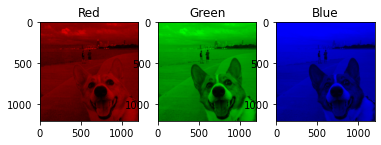

In [35]:
img_red = np.zeros(img_color.shape,dtype=int)
img_red[:,:,0] = img_color[:,:,0]

img_green = np.zeros(img_color.shape,dtype=int)
img_green[:,:,1] = img_color[:,:,1]

img_blue = np.zeros(img_color.shape,dtype=int)
img_blue[:,:,2] = img_color[:,:,2]

plt.subplot(131)
plt.imshow(img_red)
plt.title('Red')
plt.subplot(132)
plt.imshow(img_green)
plt.title('Green')
plt.subplot(133)
plt.imshow(img_blue)
plt.title('Blue')

print('Red Sum:', np.sum(img_red))
print('Green Sum:', np.sum(img_green))
print('Blue Sum:', np.sum(img_blue) )

Comments for 4.b here: Blue is the strongest in this image, and this makes sense when looking at the original image, where you can see the background is mostly blue due to the water and the sky and you can see how the concrete part looks slightly tinted blue.



We will also work with audio in this lab, so let's look at how we can load a .wav file and play back the audio we have loaded.

Sampling rate is 44100 Hz
Audio data type: <class 'numpy.ndarray'>
Audio data shape: (34752, 2)


Text(0, 0.5, 'Right Channel')

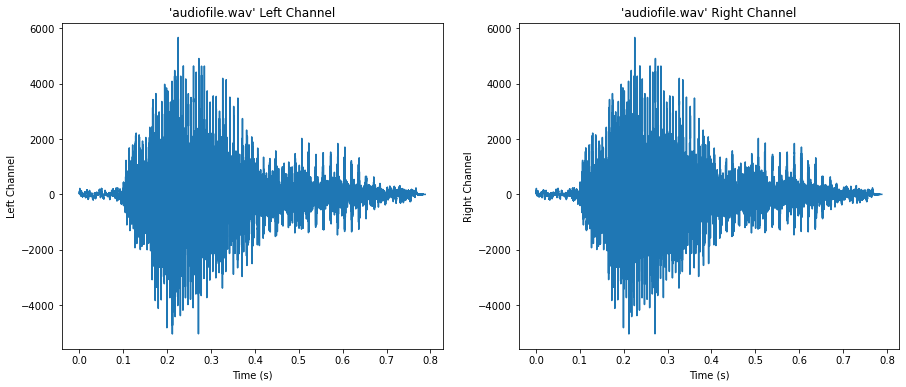

In [37]:
fs, data = wavfile.read('audiofile.wav') # fs is sampling rate, data is the audio data

print('Sampling rate is {} Hz'.format(fs))
print('Audio data type: {}'.format(type(data)))
# number_samples x 2 channels, notice the second dimension indicates the channel
print('Audio data shape: {}'.format(data.shape))

# This audio file seems to be stereo; however, the two channels are nearly identical.
# This is typically not true with stereo audio files!

time = np.linspace(0, len(data)/fs, len(data)) #array for time values in audio file
plt.figure(figsize = (15, 6))
plt.subplot(121)
plt.title("'audiofile.wav' Left Channel")
plt.plot(time,data[:, 0]) #left channel
plt.xlabel('Time (s)')
plt.ylabel('Left Channel')

plt.subplot(122)
plt.title("'audiofile.wav' Right Channel")
plt.plot(time,data[:, 1]) #right channel
plt.xlabel('Time (s)')
plt.ylabel('Right Channel')

Let's try listening to both audio channels. Make sure to start your volume low and be mindful of those around you!

In [38]:
Audio(data=[data[:, 0], data[:, 1]],rate=fs)

## Exercise 5

For this exercise, try changing the sampling rate on the audio when using $\textrm{Audio()}$. Try different values of $f_s$ from 0.5$\cdot f_s$ to 2$\cdot f_s$ where $f_s$ is the original 44,100 Hz sampling rate. The code has been provided for you in the next cell. Play around with it and answer the questions in the following markdown cell.

In [42]:
rate_factor = 1.6
Audio(data=[data[:, 0],data[:, 1]], rate=fs*rate_factor)

Answers for Exercise 5 here:

a) What do you hear when you reduce the sampling frequency? How about when you increase the sampling frequency?
When I reduce the sampling frequency, my brain starts to hear yanny but when I increase the sampling frequency, I begin to hear laurel.

b) Do you hear a different name based on the sampling frequency? If so, what is your guess as to why this is true? Don't worry about being correct here! I want your best guess, and we will explore the answer to this question in a future lab.

I think this happens because of the pronounciation of yanny/laurel. I can trick myself to alternate so I can hear both one after another, but I think that once you stretch or compress the sound it changes the entire pronounciation. 

## Submission Instructions

Make sure to place all image and data files along with your .ipynb lab report (this file) in one folder, zip the folder, and submit it to Canvas under the Lab 1 Assignment. **Please name the zip file and your lab report ``<netid>_Lab1`` to make grading easier!**